In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [2]:
# Load the dataset without headers
df = pd.read_csv(r'C:\Users\mdnah\OneDrive\Desktop\SentenceAutoCompletion\SenComplete\All_Dementia_text - Sheet1.csv', header=None)

# Rename the single column to 'sentences'
df.columns = ['sentences']

# Remove Bangla full stop "।" from all sentences
df['sentences'] = df['sentences'].str.replace('।', '', regex=False)
df['sentences'] = df['sentences'].str.replace(',', '', regex=False)  # Remove comma
df['sentences'] = df['sentences'].str.replace('\?', '', regex=True)  # Remove question mark (regex needed for "?")
print(df.head(5))

# Extract transcribed sentences
transcribed_sentences = df['sentences'].dropna().tolist()

# Tokenize sentences
tokenizer = Tokenizer(oov_token='<oov>')  # Include out-of-vocabulary token
tokenizer.fit_on_texts(transcribed_sentences)

# Vocabulary size
total_words = len(tokenizer.word_index) + 1  # Add 1 for padding index
print(f"Total unique words in vocabulary: {total_words}")

# Display word counts
word_counts = tokenizer.word_counts
print("Word Counts:")
for word, count in word_counts.items():
    print(f"{word}: {count}")


                          sentences
0   আমি খাবার কোথাও খুঁজে পাচ্ছি না
1   আমি কি খেয়েছি মনে করতে পারছি না
2  কোথায় খাবারটা রাখা হয়েছে মনে নেই
3       আজকের রান্নাটা মজাদার হয়েছে
4      পানির গ্লাসটা একটু এগিয়ে দাও
Total unique words in vocabulary: 1967
Word Counts:
আমি: 190
খাবার: 28
কোথাও: 8
খুঁজে: 14
পাচ্ছি: 11
না: 360
কি: 140
খেয়েছি: 7
মনে: 340
করতে: 113
পারছি: 80
কোথায়: 31
খাবারটা: 7
রাখা: 8
হয়েছে: 3
নেই: 60
আজকের: 4
রান্নাটা: 1
মজাদার: 1
পানির: 4
গ্লাসটা: 2
একটু: 78
এগিয়ে: 3
দাও: 37
আমার: 160
ইলিশ: 7
মাছ: 7
অনেক: 86
পছন্দের: 5
মুরগির: 2
ডিমটা: 1
সিদ্ধ: 1
করে: 77
আনো: 5
রুটি: 3
দিয়ে: 4
হাঁসের: 2
মাংস: 7
খেতে: 63
ইচ্ছা: 17
করছে: 18
খাওয়ার: 6
পর: 11
হাটাহাটি: 1
করা: 11
দরকার: 12
এখন: 42
ক্ষুধা: 3
ভাত: 9
লেগেছে: 4
ডিমটাই: 1
বেশি: 40
খাই: 2
সবাই: 3
আসো: 2
একসাথে: 2
বসি: 1
প্লেটে: 2
আরেকটু: 1
আজকে: 40
কিনে: 22
এনেছি: 2
গরুর: 3
মাংসে: 1
সমস্যা: 5
আছে: 25
বাড়িতে: 2
তরকারি: 4
শেষ: 8
হয়ে: 22
গেছে: 29
ভাবছি: 6
বিরিয়ানি: 2
রান্না: 20
করবো: 3
রান্নার: 4
মসলা: 3
বিরিয়ানির: 1
কিনতে: 18
হবে: 82

In [3]:
# Tokenize sentences
tokenizer = Tokenizer(oov_token='<oov>')  # Include out-of-vocabulary token
tokenizer.fit_on_texts(transcribed_sentences)

# Vocabulary size
total_words = len(tokenizer.word_index) + 1  # Add 1 for padding index
print(f"Total unique words in vocabulary: {total_words}")

tokenizer.word_counts


Total unique words in vocabulary: 1967


OrderedDict([('আমি', 190),
             ('খাবার', 28),
             ('কোথাও', 8),
             ('খুঁজে', 14),
             ('পাচ্ছি', 11),
             ('না', 360),
             ('কি', 140),
             ('খেয়েছি', 7),
             ('মনে', 340),
             ('করতে', 113),
             ('পারছি', 80),
             ('কোথায়', 31),
             ('খাবারটা', 7),
             ('রাখা', 8),
             ('হয়েছে', 3),
             ('নেই', 60),
             ('আজকের', 4),
             ('রান্নাটা', 1),
             ('মজাদার', 1),
             ('পানির', 4),
             ('গ্লাসটা', 2),
             ('একটু', 78),
             ('এগিয়ে', 3),
             ('দাও', 37),
             ('আমার', 160),
             ('ইলিশ', 7),
             ('মাছ', 7),
             ('অনেক', 86),
             ('পছন্দের', 5),
             ('মুরগির', 2),
             ('ডিমটা', 1),
             ('সিদ্ধ', 1),
             ('করে', 77),
             ('আনো', 5),
             ('রুটি', 3),
             ('দিয়ে', 4),
             ('হাঁসের

In [4]:
# Generate input sequences for training
input_sequences = []
for line in transcribed_sentences:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i + 1]
        input_sequences.append(n_gram_sequence)

# Pad sequences
max_sequence_len = max([len(x) for x in input_sequences])  # Determine the longest sequence
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

print(max_sequence_len)
#print(input_sequences)

# Split into predictors (X) and labels (y)
X = input_sequences[:, :-1]  # All columns except the last one
labels = input_sequences[:, -1]  # The last column as labels

# Debugging shapes
print(f"Shape of X: {X.shape}")  # Should be (2169, 12)
print(f"Shape of labels: {labels.shape}")  # Should be (2169,)

y = tf.keras.utils.to_categorical(labels, num_classes=total_words)

# Debugging shapes
print(f"Shape of y (one-hot labels): {y.shape}")  # Should be (2169, total_words)

14
Shape of X: (8067, 13)
Shape of labels: (8067,)
Shape of y (one-hot labels): (8067, 1967)


train by adjust sentence with end tag in preprocessing

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout, Attention, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

pre

In [6]:
# Load the dataset without headers
#df = pd.read_csv(r'C:\Users\AsifAK\Desktop\Code_Detect_Dementia\SenComplete\Dementia Sentence Data - Com.csv', header=None)

# Rename the single column to 'sentences'
df.columns = ['sentences']

# Add <end> token to each sentence
df['sentences'] = df['sentences'].str.replace('।', '', regex=False)  # Remove full stop (।)
df['sentences'] = df['sentences'].apply(lambda x: x + ' <end>')  # Add <end> token

# Extract transcribed sentences
transcribed_sentences = df['sentences'].dropna().tolist()

# Tokenize sentences
tokenizer = Tokenizer(oov_token='<oov>')  # Include out-of-vocabulary token
tokenizer.fit_on_texts(transcribed_sentences)

# Save the tokenizer for future use
tokenizer_save_path = r'C:\Users\mdnah\OneDrive\Desktop\SentenceAutoCompletion\SenAC_tokenizer.pkl'
with open(tokenizer_save_path, 'wb') as file:
    pickle.dump(tokenizer, file)
print(f"Tokenizer saved to: {tokenizer_save_path}")

# Vocabulary size (including <end>)
total_words = len(tokenizer.word_index) + 1  # Add 1 for padding index
print(f"Total unique words in vocabulary: {total_words}")

# Generate input sequences for training
input_sequences = []
for line in transcribed_sentences:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i + 1]
        input_sequences.append(n_gram_sequence)

# Pad sequences
max_sequence_len = max([len(x) for x in input_sequences])  # Determine the longest sequence
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

print(f"Max sequence length: {max_sequence_len}")


Tokenizer saved to: C:\Users\mdnah\OneDrive\Desktop\SentenceAutoCompletion\SenAC_tokenizer.pkl
Total unique words in vocabulary: 1968
Max sequence length: 15


 Bi-LSTM model

In [7]:
# Split into predictors (X) and labels (y)
X = input_sequences[:, :-1]  # All columns except the last one
labels = input_sequences[:, -1]  # The last column as labels

# One-hot encode the labels
y = tf.keras.utils.to_categorical(labels, num_classes=total_words)

# Split the data into training, validation, and testing sets
X_train_temp, X_val_test, y_train_temp, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Debugging shapes
print(f"Shape of X_train_temp: {X_train_temp.shape}")
print(f"Shape of y_train_temp: {y_train_temp.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Define the LSTM model
input_layer = Input(shape=(X_train_temp.shape[1],))  # Length of sequences (max_sequence_len)
embedding_layer = Embedding(input_dim=total_words, output_dim=100)(input_layer)  # Embedding layer
bilstm = Bidirectional(LSTM(150, return_sequences=True))(embedding_layer)  # BiLSTM layer
attention_layer = Attention()([bilstm, bilstm])  # Attention mechanism
bilstm2 = Bidirectional(LSTM(150))(attention_layer)  # Second BiLSTM layer
dropout = Dropout(0.5)(bilstm2)  # Dropout to prevent overfitting
output_layer = Dense(total_words, activation='softmax')(dropout)  # Output layer (predict next word)

# Compile the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Display model summary
model.summary()

Shape of X_train_temp: (7343, 14)
Shape of y_train_temp: (7343, 1968)
Shape of X_val: (918, 14)
Shape of y_val: (918, 1968)
Shape of X_test: (918, 14)
Shape of y_test: (918, 1968)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 14)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 14, 100)   │    196,800 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 14, 300)   │    301,200 │ embedding[0][0]   │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, 14, 300)   │          0 │ bidirectional[0]… │
│ (Attention)         │                   │            │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 300)       │    541,200 │ attention[0][0]   │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 300)       │          0 │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1968)      │    592,368 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,631,568 (6.22 MB)

 Trainable params: 1,631,568 (6.22 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Train the model
history = model.fit(X_train_temp, y_train_temp, epochs=70, validation_data=(X_val, y_val), verbose=1)

# Save the model
model_save_path = r'C:\Users\mdnah\OneDrive\Desktop\SentenceAutoCompletion\Bi-LSTM_model.h5'
model.save(model_save_path)
print(f"Model saved to: {model_save_path}")

Epoch 1/70
230/230 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.1186 - loss: 6.4511 - val_accuracy: 0.1209 - val_loss: 5.9347
Epoch 2/70
230/230 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.1393 - loss: 5.6588 - val_accuracy: 0.1144 - val_loss: 5.9226
Epoch 3/70
230/230 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.1384 - loss: 5.5498 - val_accuracy: 0.1253 - val_loss: 5.9677
Epoch 4/70
230/230 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.1528 - loss: 5.3487 - val_accuracy: 0.1373 - val_loss: 5.8557
Epoch 5/70
230/230 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.1541 - loss: 5.3359 - val_accuracy: 0.1362 - val_loss: 5.8689
Epoch 6/70
230/230 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.1786 - loss: 5.1059 - val_accuracy: 0.1481 - val_loss: 5.9806
Epoch 7/70
230/230 ━━━━━━━━━━━━━━━━━━━━ 32s 137ms/step - accuracy: 0.1889 - loss: 5.0099 - val_accuracy: 0.1318 - val_loss: 5.9528
Epoch 8/70
230/230 ━━━━━━━━━━━━━━━━━━━━ 38s 124ms/step - accuracy: 0.1888 - loss: 5.0038 

Model saved to: C:\Users\mdnah\OneDrive\Desktop\SentenceAutoCompletion\Bi-LSTM_model.h5


In [9]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [12]:
# Evaluate the model on training, validation, and test sets
train_loss, train_accuracy = model.evaluate(X_train_temp, y_train_temp, verbose=1)
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=1)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

print(f"Training Accuracy: {train_accuracy:.4f}, Training Loss: {train_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}, Validation Loss: {val_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")



# Predict classes for the test set
y_pred_probs = model.predict(X_test, verbose=1)  # Probabilities
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Predicted classes
y_true_classes = np.argmax(y_test, axis=1)  # True classes

# # Generate confusion matrix
# conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=range(total_words))

# # Plot confusion matrix
# plt.figure(figsize=(10, 8))
# disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
# plt.title("Confusion Matrix for Test Set")
# plt.show()



# Get the unique class indices in the test set
unique_classes = sorted(np.unique(y_true_classes))

# Map the tokenizer indices to words for the target names
index_to_word = {index: word for word, index in tokenizer.word_index.items()}

# Filter target names to only include classes in the test set
target_names = [index_to_word.get(i, f"Class {i}") for i in unique_classes]

# Generate the classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=target_names)
print("Classification Report:\n")
print(report)

230/230 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.8104 - loss: 0.8704
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.1987 - loss: 10.1831
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.2156 - loss: 10.5178
Training Accuracy: 0.8031, Training Loss: 0.8850
Validation Accuracy: 0.1972, Validation Loss: 10.4149
Test Accuracy: 0.2059, Test Loss: 10.6134
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


ValueError: Number of classes, 595, does not match size of target_names, 416. Try specifying the labels parameter

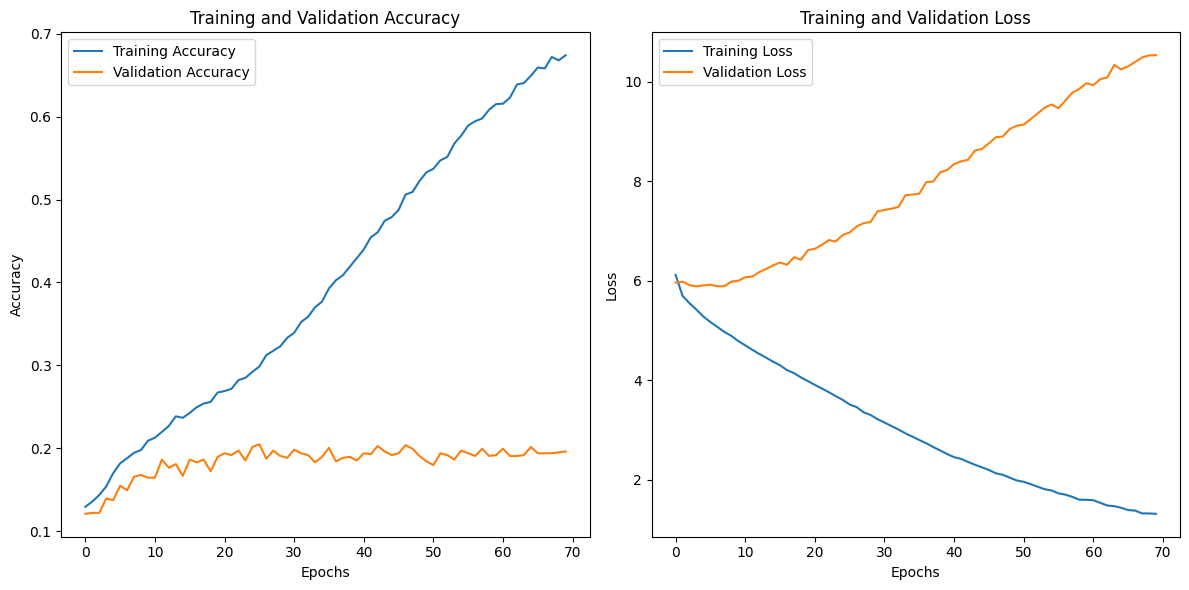

In [11]:
import matplotlib.pyplot as plt

# Extract the accuracy and loss values from the history object
history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# Plot accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Good Predict Function

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [9]:
def complete_sentence_with_end_token(model, tokenizer, seed_text, max_sequence_len, max_words=10):
    completed_sentence = seed_text
    for _ in range(max_words):
        token_list = tokenizer.texts_to_sequences([completed_sentence])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        
        predicted_probs = model.predict(token_list, verbose=0)
        predicted_index = np.argmax(predicted_probs, axis=-1)
        
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                output_word = word
                break

        # Stop if the word is the <end> token
        if output_word == "end":
            break

        # Append the predicted word to the sentence
        completed_sentence += " " + output_word

        completed_sentence = completed_sentence.replace(" end", "")

    return completed_sentence

# Initial seed text
seed_text = "সকালে আমি নাস্তা করেছিলাম"  # Replace with your Bangla text সকালে আমি নাস্তা করেছিলাম  এবার করবানির ছাগলের    আমার রুটি দিয়ে হাঁসের  এই জামাটা পরতে

# Define the number of words to predict
#num_words_to_predict = 5 # Adjust based on your desired completion length

# Complete the sentence
completed_sentence = complete_sentence_with_end_token(model, tokenizer, seed_text, max_sequence_len)
print(f"Completed Sentence: {completed_sentence}")

Completed Sentence: সকালে আমি নাস্তা করেছিলাম লাভ লাভ লাভ লাভ লাভ লাভ লাভ পরেছি পরেছি পরেছি


In [15]:
# Load the saved BiLSTM model
model_save_path = r'C:\Users\mdnah\OneDrive\Desktop\SentenceAutoCompletion\Bi-LSTM_model.h5'
model = load_model(model_save_path)
#print(f"Model loaded from: {model_save_path}")

# Load the saved tokenizer
tokenizer_save_path = r"C:\Users\mdnah\OneDrive\Desktop\SentenceAutoCompletion\SenAC_tokenizer.pkl"
with open(tokenizer_save_path, 'rb') as file:
    tokenizer = pickle.load(file)
#print("Tokenizer loaded successfully.")

# Function to complete the sentence
def complete_sentence_with_end_token(model, tokenizer, seed_text, max_sequence_len, max_words=10):
    completed_sentence = seed_text
    for _ in range(max_words):
        token_list = tokenizer.texts_to_sequences([completed_sentence])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        
        predicted_probs = model.predict(token_list, verbose=0)
        predicted_index = np.argmax(predicted_probs, axis=-1)
        
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                output_word = word
                break

        # Stop if the word is the <end> token
        if output_word == "end":
            break

        # Append the predicted word to the sentence
        completed_sentence += " " + output_word

        completed_sentence = completed_sentence.replace(" end", "")

    return completed_sentence

# Initial seed text
seed_text = "ঈদে আসলে"  # Replace with your Bangla text সকালে আমি নাস্তা করেছিলাম  এবার করবানির ছাগলের    আমার রুটি দিয়ে হাঁসের  এই জামাটা পরতে

# Define the number of words to predict
#num_words_to_predict = 5 # Adjust based on your desired completion length
max_sequence_len = 15
# Complete the sentence
completed_sentence = complete_sentence_with_end_token(model, tokenizer, seed_text, max_sequence_len)
print(f"Completed Sentence: {completed_sentence}")

Completed Sentence: ঈদে আসলে অনেক মানের ভাত আর এগিয়ে রাখো


New Encoder Decoder LSTM model

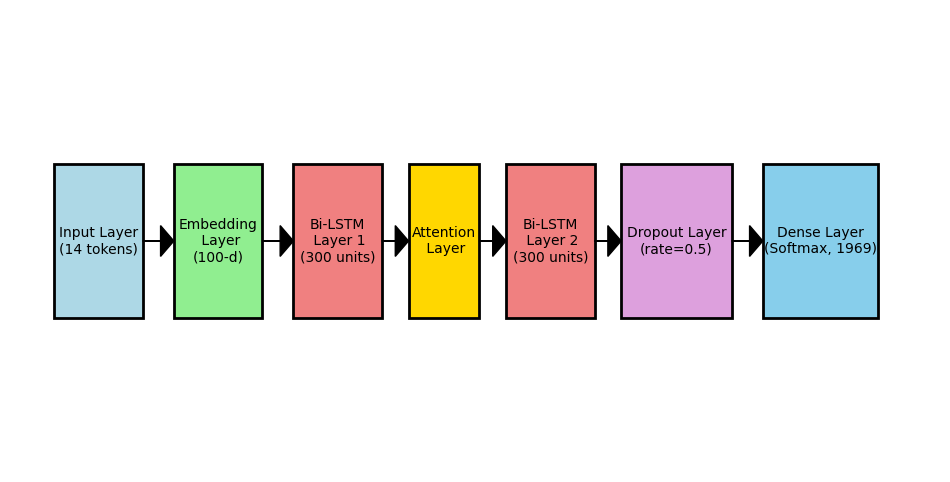

In [29]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Function to add layer boxes
def add_layer(ax, x, y, width, height, label, color):
    rect = patches.Rectangle((x, y), width, height, edgecolor='black', facecolor=color, lw=2)
    ax.add_patch(rect)
    ax.text(x + width / 2, y + height / 2, label, ha='center', va='center', fontsize=10)

# Create a figure
fig, ax = plt.subplots(figsize=(12, 6))

# Define layers with their positions and properties
layers = [
    {"x": 0, "y": 4, "label": "Input Layer\n(14 tokens)", "color": "lightblue", "width": 2, "height": 1},
    {"x": 2.7, "y": 4, "label": "Embedding\n Layer\n(100-d)", "color": "lightgreen", "width": 2, "height": 1},
    {"x": 5.4, "y": 4, "label": "Bi-LSTM\n Layer 1\n(300 units)", "color": "lightcoral", "width": 2, "height": 1},
    {"x": 8, "y": 4, "label": "Attention\n Layer", "color": "gold", "width": 1.6, "height": 1},
    {"x": 10.2, "y": 4, "label": "Bi-LSTM\n Layer 2\n(300 units)", "color": "lightcoral", "width": 2, "height": 1},
    {"x": 12.8, "y": 4, "label": "Dropout Layer\n(rate=0.5)", "color": "plum", "width": 2.5, "height": 1},
    {"x": 16, "y": 4, "label": "Dense Layer\n(Softmax, 1969)", "color": "skyblue", "width": 2.6, "height": 1},
]

# Add layers to the plot
for layer in layers:
    add_layer(ax, layer["x"], layer["y"], layer["width"], layer["height"], layer["label"], layer["color"])

# Draw arrows between layers
for i in range(len(layers) - 1):
    start_x = layers[i]["x"] + layers[i]["width"]
    start_y = layers[i]["y"] + layers[i]["height"] / 2
    end_x = layers[i + 1]["x"]
    end_y = layers[i + 1]["y"] + layers[i + 1]["height"] / 2
    ax.arrow(start_x, start_y, end_x - start_x - 0.3, 0, head_width=0.2, head_length=0.3, fc='black', ec='black')

# Adjust plot limits and remove axes
ax.set_xlim(-1, 20)
ax.set_ylim(3, 6)
ax.axis('off')

# Save the diagram
plt.savefig("BiLSTM_Model_Architecture.png", bbox_inches='tight')
plt.show()


In [35]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle
#from nltk.translate.bleu_score import sentence_bleu

In [36]:
# Load the dataset without headers
df = pd.read_csv(r'C:\Users\mdnah\OneDrive\Desktop\SentenceAutoCompletion\SenComplete\All_Dementia_text - Sheet1.csv', header=None)

# Rename the single column to 'sentences'
df.columns = ['sentences']

# Add <end> token to each sentence and clean data
df['sentences'] = df['sentences'].str.replace('।', '', regex=False)  # Remove Bangla full stop
df['sentences'] = df['sentences'].str.replace(',', '', regex=False)  # Remove commas
df['sentences'] = df['sentences'].apply(lambda x: x + ' <end>')  # Add <end> token

# Extract transcribed sentences
transcribed_sentences = df['sentences'].dropna().tolist()

# Tokenize sentences
tokenizer = Tokenizer(oov_token='<oov>')
tokenizer.fit_on_texts(transcribed_sentences)

# Save the tokenizer for future use
tokenizer_save_path = r'C:\Users\mdnah\OneDrive\Desktop\SentenceAutoCompletion\Second_SenAC_tokenizer.pkl'
with open(tokenizer_save_path, 'wb') as file:
    pickle.dump(tokenizer, file)
print(f"Tokenizer saved to: {tokenizer_save_path}")

# Vocabulary size
total_words = len(tokenizer.word_index) + 1
print(f"Total unique words in vocabulary: {total_words}")

# Generate input sequences for training
input_sequences = []
for line in transcribed_sentences:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i + 1]
        input_sequences.append(n_gram_sequence)

# Pad sequences
max_sequence_len = max([len(x) for x in input_sequences])  # Find the maximum sequence length
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
print(f"Max sequence length: {max_sequence_len}")

# Split predictors and labels
X = input_sequences[:, :-1]  # All columns except the last one
labels = input_sequences[:, -1]  # The last column as labels

# One-hot encode the labels
y = tf.keras.utils.to_categorical(labels, num_classes=total_words)

# Split data into training, validation, and test sets
X_train_temp, X_val_test, y_train_temp, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Debugging shapes
print(f"Training data shape: X_train_temp={X_train_temp.shape}, y_train_temp={y_train_temp.shape}")
print(f"Validation data shape: X_val={X_val.shape}, y_val={y_val.shape}")
print(f"Testing data shape: X_test={X_test.shape}, y_test={y_test.shape}")

Tokenizer saved to: C:\Users\mdnah\OneDrive\Desktop\SentenceAutoCompletion\Second_SenAC_tokenizer.pkl
Total unique words in vocabulary: 1968
Max sequence length: 15
Training data shape: X_train_temp=(7343, 14), y_train_temp=(7343, 1968)
Validation data shape: X_val=(918, 14), y_val=(918, 1968)
Testing data shape: X_test=(918, 14), y_test=(918, 1968)


In [37]:
# Define the model
input_layer = Input(shape=(X_train_temp.shape[1],))
embedding_layer = Embedding(input_dim=total_words, output_dim=150)(input_layer)
bilstm = Bidirectional(LSTM(150, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(embedding_layer)
batch_norm1 = BatchNormalization()(bilstm)
bilstm2 = Bidirectional(LSTM(150, return_sequences=False, dropout=0.2, recurrent_dropout=0.2))(batch_norm1)
batch_norm2 = BatchNormalization()(bilstm2)
dropout = Dropout(0.5)(batch_norm2)
output_layer = Dense(total_words, activation='softmax')(dropout)

# Compile the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Display model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 14, 150)        │       295,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 14, 300)        │       361,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 300)        │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 300)            │       541,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1968)           │       592,368 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,792,368 (6.84 MB)

 Trainable params: 1,791,168 (6.83 MB)

 Non-trainable params: 1,200 (4.69 KB)

Epoch 1/60
115/115 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.3919 - loss: 3.2184 - val_accuracy: 0.2277 - val_loss: 5.3833
Epoch 2/60
115/115 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - accuracy: 0.4207 - loss: 2.9679 - val_accuracy: 0.2342 - val_loss: 5.4221
Epoch 3/60
115/115 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.4265 - loss: 2.8551 - val_accuracy: 0.2440 - val_loss: 5.4568
Epoch 4/60
115/115 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - accuracy: 0.4614 - loss: 2.6924 - val_accuracy: 0.2429 - val_loss: 5.4763
Epoch 5/60
115/115 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.4909 - loss: 2.5620 - val_accuracy: 0.2331 - val_loss: 5.5059
Epoch 6/60
115/115 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.5086 - loss: 2.4240 - val_accuracy: 0.2375 - val_loss: 5.5394
Epoch 7/60
115/115 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.5264 - loss: 2.2898 - val_accuracy: 0.2244 - val_loss: 5.5977
Epoch 8/60
115/115 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - accuracy: 0.5496 - loss: 2.1879 - val_accu

Model saved to: C:\Users\mdnah\OneDrive\Desktop\SentenceAutoCompletion\v2_Bi-LSTM_model_v2.h5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2367 - loss: 8.0927
Test Loss: 7.932483673095703, Test Accuracy: 0.25163400173187256


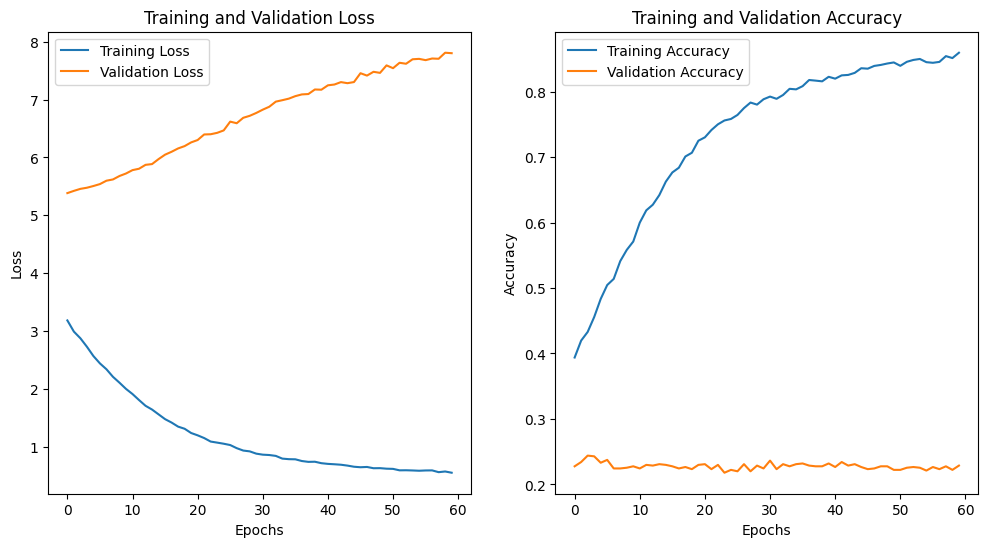

In [39]:
# Early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Train the model
history = model.fit(
    X_train_temp, y_train_temp,
    epochs=60,
    validation_data=(X_val, y_val),
    batch_size=64,
    #callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Save the model
model_save_path = r'C:\Users\mdnah\OneDrive\Desktop\SentenceAutoCompletion\v2_Bi-LSTM_model_v2.h5'
model.save(model_save_path)
print(f"Model saved to: {model_save_path}")

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Plot training and validation loss/accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
